In [1]:
from sklearn.model_selection import train_test_split
from preamble import *
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
   

In [2]:


df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

#df.loc[df['shares'] <= 1400, 'split'] = 'Unpopular'
#df.loc[df['shares'] > 1400, 'split'] = 'Popular'

#df['split']

In [3]:
df.shape


(39644, 61)

In [4]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]


In [5]:
data=dfr12
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [6]:
target=  df.iloc[:,60]

In [7]:
target.head()

0     593
1    1500
2     711
3    1200
4     505
Name: shares, dtype: int64

In [8]:
print(target)

0          593
1         1500
2          711
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name: shares, Length: 39644, dtype: int64


In [9]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [11]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [12]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


In [13]:
d=df[df['shares'] < 10000]
print(d)
d.shape

                                                     url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...        731   
1      http://mashable.com/2013/01/07/apple-40-billio...        731   
2      http://mashable.com/2013/01/07/ap-samsung-spon...        731   
3      http://mashable.com/2013/01/07/astronaut-notre...        731   
4       http://mashable.com/2013/01/07/att-u-verse-apps/        731   
5       http://mashable.com/2013/01/07/beewi-smart-toys/        731   
6      http://mashable.com/2013/01/07/bodymedia-armba...        731   
7       http://mashable.com/2013/01/07/canon-poweshot-n/        731   
8      http://mashable.com/2013/01/07/car-of-the-futu...        731   
9      http://mashable.com/2013/01/07/chuck-hagel-web...        731   
10     http://mashable.com/2013/01/07/cosmic-events-d...        731   
11      http://mashable.com/2013/01/07/crayon-creatures/        731   
12         http://mashable.com/2013/01/07/creature-cups/        731   
14    

(37429, 61)

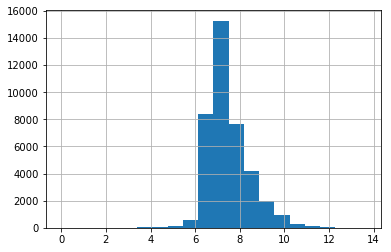

In [14]:
df['shares_log'] = np.log(df['shares'])
df['shares_log'].hist(bins=20)

In [15]:
features_wordslinks= list(df.iloc[:,[2,3,4,5,6,7,8,9,10,11,28,29,30]])
features_timechannel= list(df.iloc[:,[13,14,15,16,17,18,31,32,33,34,35,36,37,38]])
features_keywords= list(df.iloc[:,[12,19,20,21,22,23,24,25,26,27]])
features_NLP= list(df.iloc[:,[39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]])
print(features_wordslinks)
print("-----------------------------------")
print(features_timechannel)
print("------------------------------------")
print(features_keywords)
print("------------------------------------")
print(features_NLP)


# now as ou know our split column is a object type so we can map it to integer value
df.loc[df['shares'] <= 1400, 'split'] = '0'
df.loc[df['shares'] > 1400, 'split'] = '1'

df['split']

df.head()

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']
-----------------------------------
['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
------------------------------------
['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']
------------------------------------
['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_r

,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_sentiment_polarity,shares,shares_log,split
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,...,0.19,593,6.39,0
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.00,1500,7.31,1
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.00,711,6.57,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,...,0.00,1200,7.09,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,...,0.14,505,6.22,0


In [16]:
df.describe() # this will describe the all statistical function of our data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_log
count,39644.00,39644.00,39644.00,39644.00,...,39644.00,39644.00,39644.00,39644.00
mean,354.53,10.40,546.51,0.55,...,0.34,0.16,3395.38,7.47
std,214.16,2.11,471.11,3.52,...,0.19,0.23,11626.95,0.93
min,8.00,2.00,0.00,0.00,...,0.00,0.00,1.00,0.00
25%,164.00,9.00,246.00,0.47,...,0.17,0.00,946.00,6.85
50%,339.00,10.00,409.00,0.54,...,0.50,0.00,1400.00,7.24
75%,542.00,12.00,716.00,0.61,...,0.50,0.25,2800.00,7.94
max,731.00,23.00,8474.00,701.00,...,0.50,1.00,843300.00,13.65


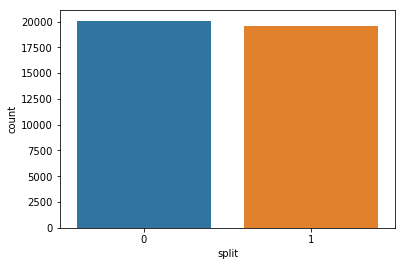

In [17]:
sns.countplot(df['split'],label="Count")
plt.savefig('fig1.png', bbox_inches='tight')

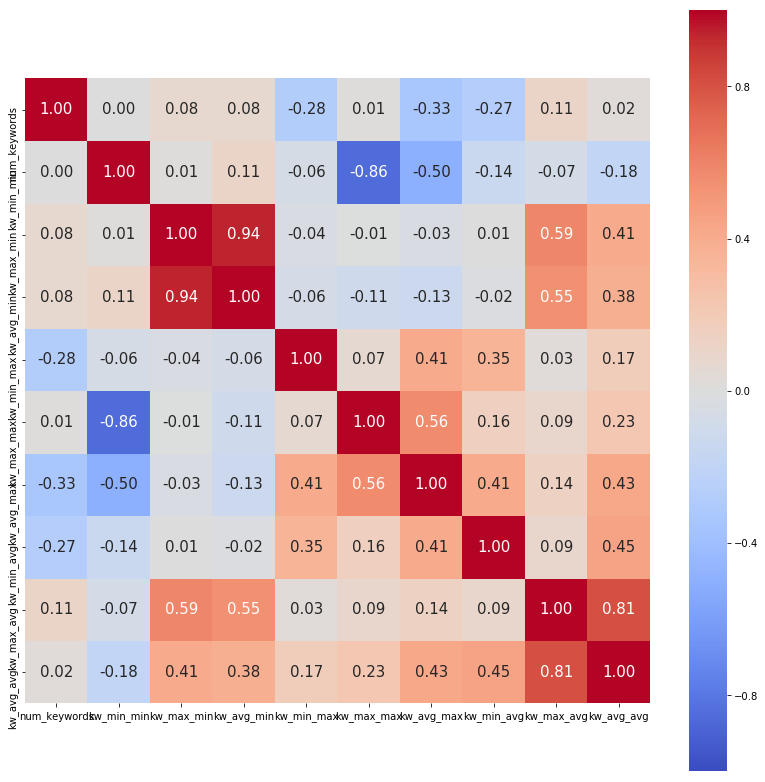

In [18]:
#correlation matrix
corr = df[features_keywords].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_keywords, yticklabels= features_keywords,
           cmap= 'coolwarm') 

plt.savefig('test.pdf')

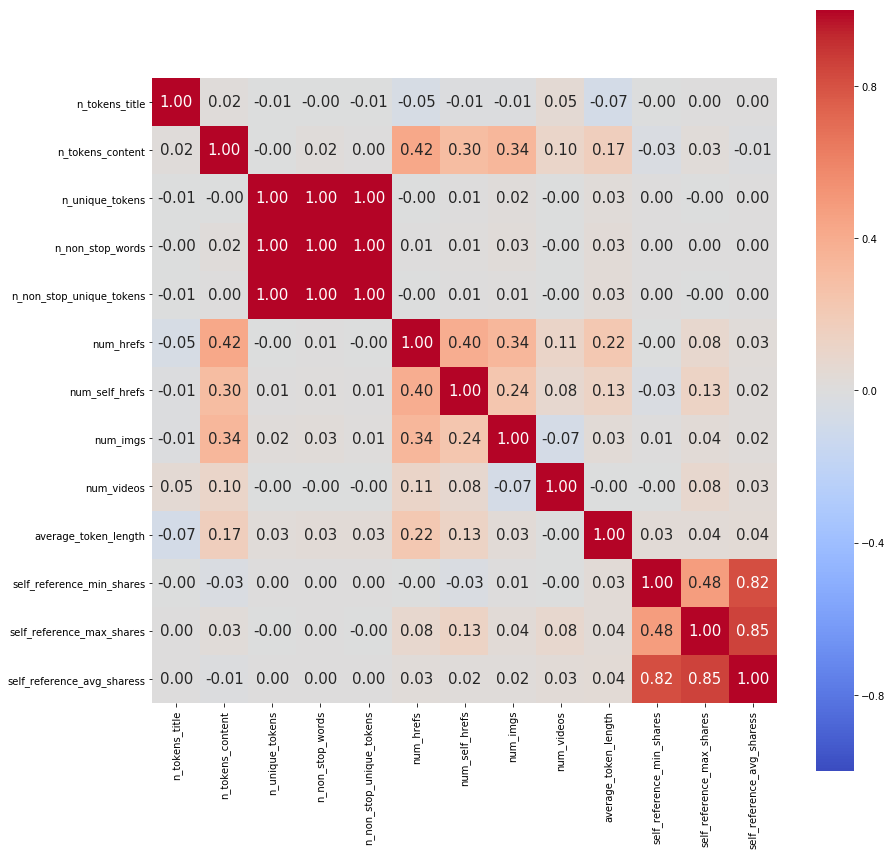

In [19]:

corr = df[features_wordslinks].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_wordslinks, yticklabels= features_wordslinks,
           cmap= 'coolwarm') 

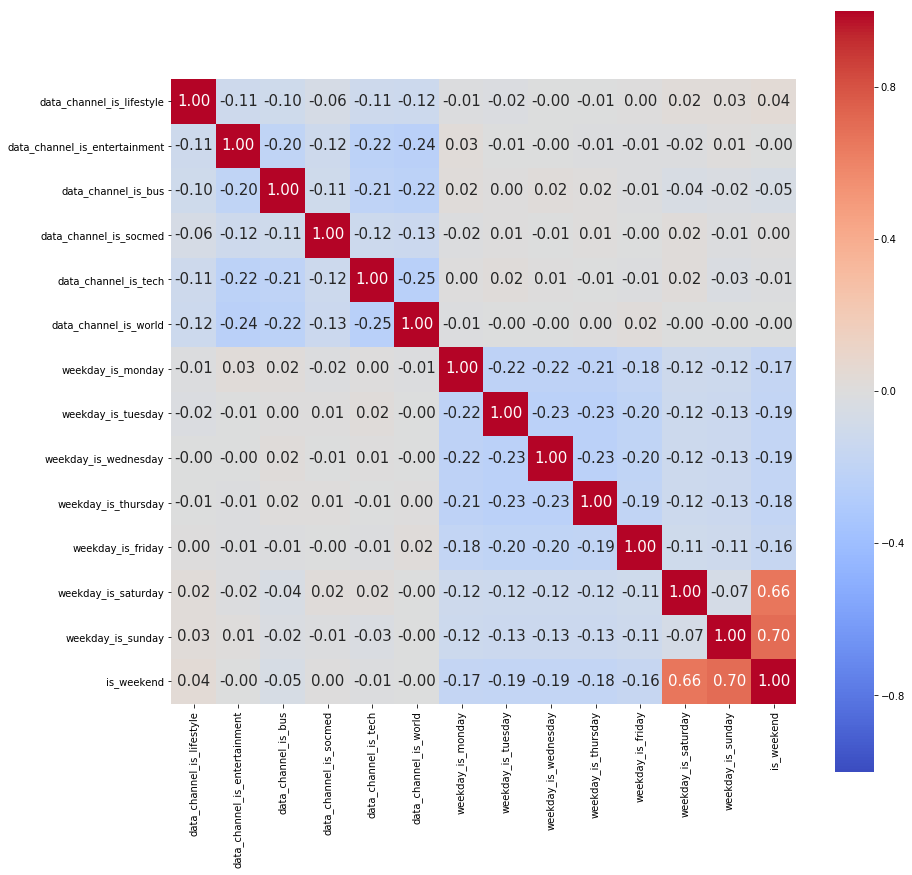

In [20]:

corr = df[features_timechannel].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_timechannel, yticklabels= features_timechannel,
           cmap= 'coolwarm')


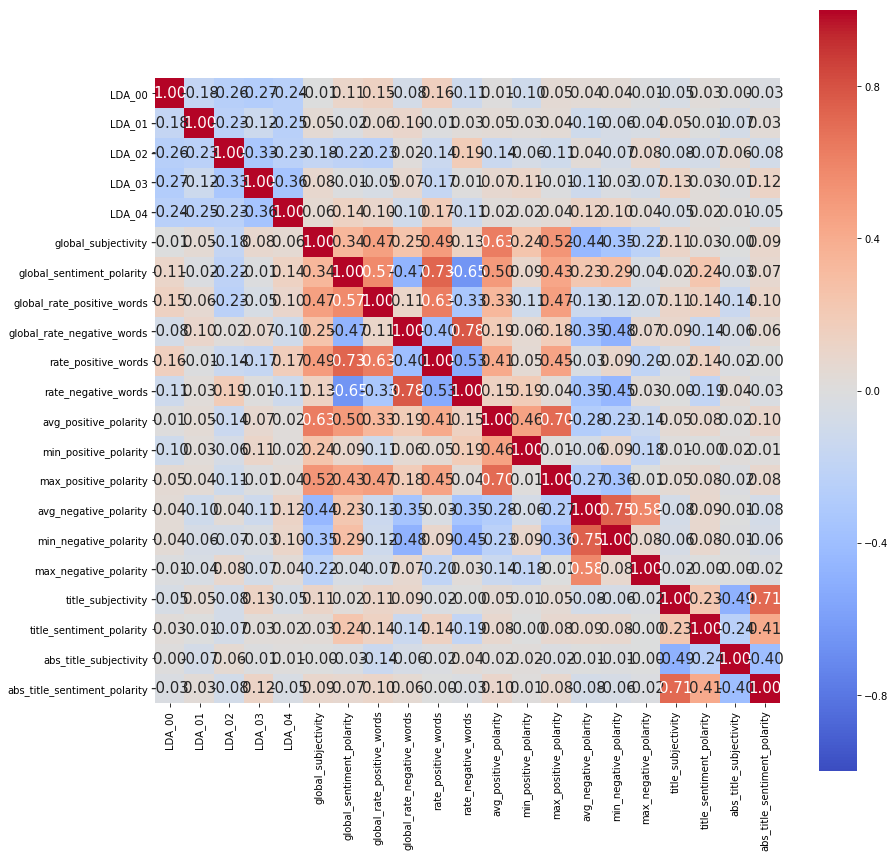

In [21]:

corr = df[features_NLP].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_NLP, yticklabels= features_NLP,
           cmap= 'coolwarm') 

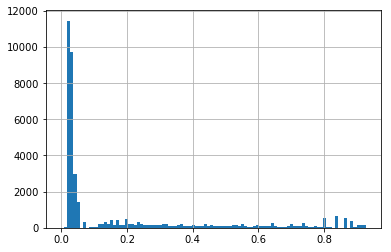

In [22]:
df['LDA_00'].hist(bins=100)

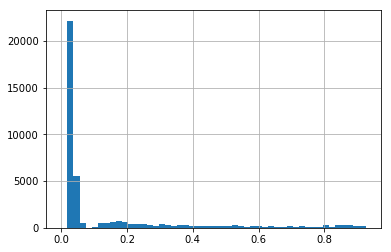

In [23]:
df['LDA_01'].hist(bins=50)

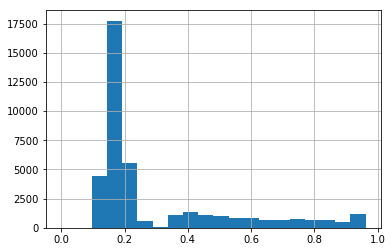

In [24]:
df['LDA_01_sqrt'] = np.sqrt(df['LDA_01'])
df['LDA_01_sqrt'].hist(bins=20)

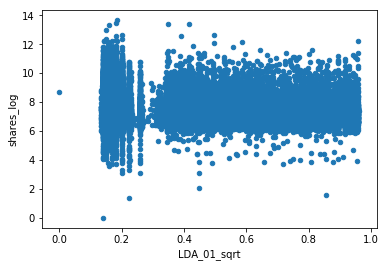

In [25]:
df.plot(kind='scatter', x='LDA_01_sqrt', y='shares_log')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [27]:
features_keywords= list(df.iloc[:,[12,19,20,21,22,23,24,25,26,27]])

#X_train.iloc[1:100,3:15]

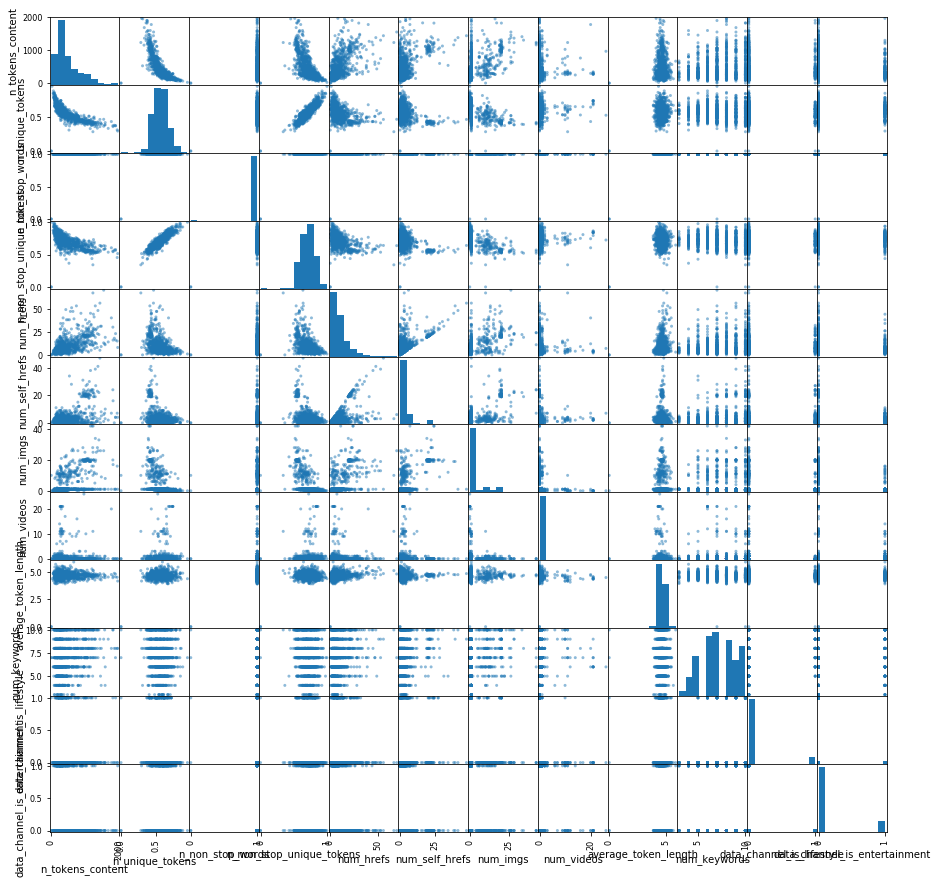

In [28]:
#scatter matrix
pd.plotting.scatter_matrix(df.iloc[1:1000,3:15], figsize=(15, 15),  alpha=0.5)

plt.savefig('test.pdf')




